In [1]:
import pandas as pd 
import re
import json 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [2]:
with open('tweets_no_freq_words.txt', 'r') as filehandle: 
    tweets=json.load(filehandle)

In [3]:
tweets

['wootenomics and i were thinking about roses today checkout his newsletter and subscribe',
 'personal finance advice happy day after valentinesday where roses are as pretty but cheaper  relationship advice  listen to the above advice',
 'econwithdustin theecongames soundsthey are enjoying it',
 'dganstinei do  miles between cincinnati and lexingtona big difference cant imagine how much of a difference it would be to move closer to the lakes',
 'dganstine this sounds amazing i love winter weather',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk itcreates a high barrier to entry because you have to prove that you will not fail what i called paternal government policies in my last discussion',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk the bureaucracy is a function of culture not the otheraround the conversation around taking risk is controlled by parents fear of their kids failing  thes

In [ ]:
vectorizer=CountVectorizer(stop_words='english')
doc_words=vectorizer.fit_transform(tweets)

In [8]:
doc_words

<209141x205647 sparse matrix of type '<class 'numpy.int64'>'
	with 2179972 stored elements in Compressed Sparse Row format>

In [9]:
sum_words = doc_words.sum(axis=0) 

In [12]:
sum_words

matrix([[13,  7,  3, ...,  1,  1,  1]])

In [13]:
vectorizer.vocabulary_.items()

dict_items([('wootenomics', 200553), ('thinking', 180503), ('roses', 154336), ('today', 182999), ('checkout', 31243), ('newsletter', 123070), ('subscribe', 171842), ('personal', 136867), ('finance', 63091), ('advice', 2997), ('happy', 75013), ('day', 43335), ('valentinesday', 191763), ('pretty', 142308), ('cheaper', 31184), ('relationship', 149897), ('listen', 104473), ('econwithdustin', 53197), ('theecongames', 177843), ('soundsthey', 167192), ('enjoying', 56219), ('dganstinei', 46449), ('miles', 115321), ('cincinnati', 32727), ('lexingtona', 103241), ('big', 20426), ('difference', 46896), ('imagine', 83219), ('closer', 33973), ('lakes', 100619), ('dganstine', 46448), ('sounds', 167081), ('amazing', 7017), ('love', 106395), ('winter', 199741), ('weather', 195722), ('mohammedalrahbi', 117334), ('shathamaskiry', 161606), ('nasralbusaidi', 121316), ('jeni_houser', 92712), ('dmpender', 48724), ('jstorres', 95797), ('drnickombe', 50836), ('elonmusk', 54938), ('itcreates', 89383), ('high', 

In [14]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

In [16]:
words_freq

[('wootenomics', 96),
 ('thinking', 1259),
 ('roses', 77),
 ('today', 2965),
 ('checkout', 14),
 ('newsletter', 124),
 ('subscribe', 155),
 ('personal', 581),
 ('finance', 710),
 ('advice', 581),
 ('happy', 1823),
 ('day', 3595),
 ('valentinesday', 22),
 ('pretty', 1781),
 ('cheaper', 170),
 ('relationship', 328),
 ('listen', 509),
 ('econwithdustin', 23),
 ('theecongames', 99),
 ('soundsthey', 7),
 ('enjoying', 82),
 ('dganstinei', 2),
 ('miles', 160),
 ('cincinnati', 10),
 ('lexingtona', 2),
 ('big', 2913),
 ('difference', 821),
 ('imagine', 750),
 ('closer', 258),
 ('lakes', 17),
 ('dganstine', 11),
 ('sounds', 449),
 ('amazing', 1143),
 ('love', 1955),
 ('winter', 405),
 ('weather', 219),
 ('mohammedalrahbi', 4),
 ('shathamaskiry', 16),
 ('nasralbusaidi', 8),
 ('jeni_houser', 118),
 ('dmpender', 8),
 ('jstorres', 8),
 ('drnickombe', 8),
 ('elonmusk', 85),
 ('itcreates', 2),
 ('high', 2245),
 ('barrier', 71),
 ('entry', 246),
 ('prove', 175),
 ('fail', 249),
 ('called', 810),
 ('pat

In [17]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [18]:
words_freq

[('good', 8413),
 ('new', 8284),
 ('covid', 7154),
 ('work', 6268),
 ('great', 5774),
 ('paper', 5364),
 ('data', 5138),
 ('policy', 4955),
 ('year', 4694),
 ('thanks', 4381),
 ('years', 4077),
 ('point', 3764),
 ('day', 3595),
 ('economics', 3357),
 ('economic', 3297),
 ('vaccine', 3250),
 ('use', 3227),
 ('read', 3081),
 ('sure', 2972),
 ('today', 2965),
 ('got', 2942),
 ('public', 2935),
 ('big', 2913),
 ('market', 2889),
 ('research', 2863),
 ('best', 2818),
 ('world', 2722),
 ('important', 2703),
 ('things', 2694),
 ('thing', 2686),
 ('interesting', 2679),
 ('said', 2620),
 ('pandemic', 2612),
 ('bad', 2596),
 ('different', 2589),
 ('actually', 2565),
 ('trump', 2498),
 ('maybe', 2494),
 ('agree', 2479),
 ('look', 2462),
 ('case', 2432),
 ('government', 2429),
 ('thank', 2422),
 ('countries', 2417),
 ('social', 2371),
 ('students', 2370),
 ('news', 2321),
 ('health', 2292),
 ('course', 2278),
 ('change', 2266),
 ('question', 2262),
 ('money', 2262),
 ('ive', 2258),
 ('high', 2245)

In [19]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
common_words = get_top_n_words(tweets, 25)

In [23]:
common_words

[('good', 8413),
 ('new', 8284),
 ('covid', 7154),
 ('work', 6268),
 ('great', 5774),
 ('paper', 5364),
 ('data', 5138),
 ('policy', 4955),
 ('year', 4694),
 ('thanks', 4381),
 ('years', 4077),
 ('point', 3764),
 ('day', 3595),
 ('economics', 3357),
 ('economic', 3297),
 ('vaccine', 3250),
 ('use', 3227),
 ('read', 3081),
 ('sure', 2972),
 ('today', 2965),
 ('got', 2942),
 ('public', 2935),
 ('big', 2913),
 ('market', 2889),
 ('research', 2863)]

In [ ]:
for word, freq in common_words:
    print(word, freq)

In [25]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])

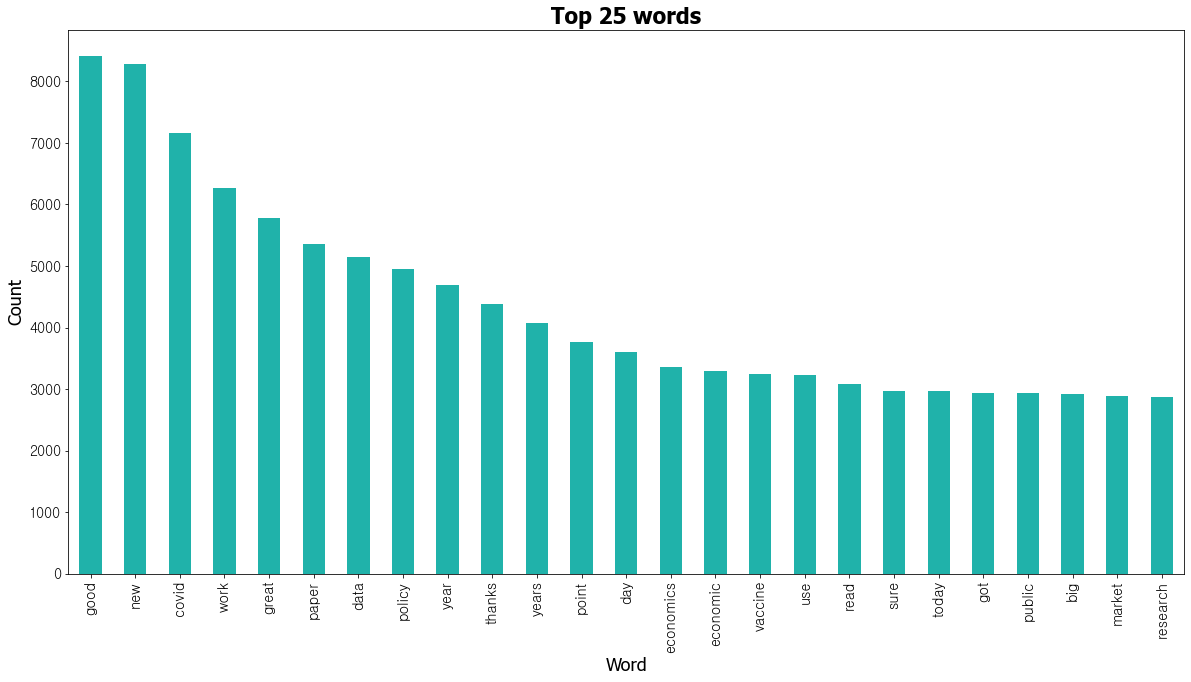

In [51]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
plt.plot
graph=df2.groupby('word').sum()['count'].sort_values(ascending=False)
graph.plot(kind='bar',color='lightseagreen')
plt.xlabel("Word", **tfont)
plt.ylabel("Count", **tfont)
plt.title('Top 25 words', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('top25words.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();